In [2]:
# Install package for Lasso
if(!require("glmnet")){
    install.packages("glmnet")
}

# Install package for HMLasso
if(!require("hmlasso")){
    install.packages("hmlasso")
}

# Install package for Pliable Lasso
if(!require("pliable")){
    url <- "https://cran.r-project.org/src/contrib/Archive/pliable/pliable_1.1.tar.gz"
    pkgFile <- "pliable_1.1.tar.gz"
    download.file(url = url, destfile = pkgFile)
    install.packages(pkgs=pkgFile, type="source", repos=NULL)
    unlink(pkgFile)
}

Loading required package: pliable

Loading required package: class



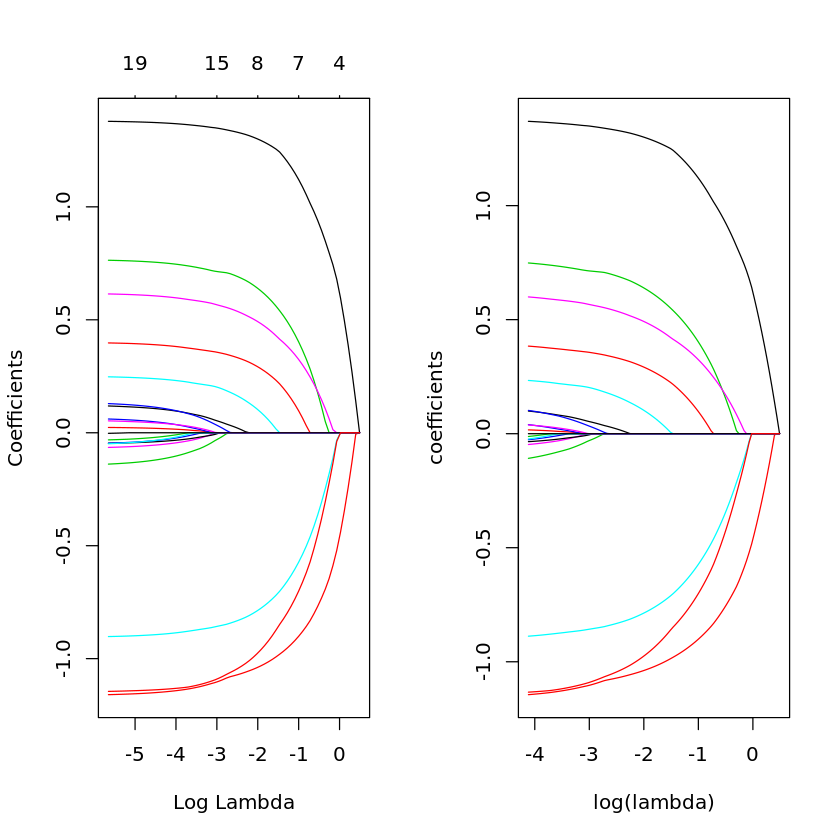

In [20]:
library(glmnet)
library(hmlasso)
data(QuickStartExample)
fit_glmnet <- glmnet(x, y)
fit_hmlasso <- hmlasso(x, y)
par(mfrow=c(1,2))
plot(fit_glmnet, xvar="lambda")
plot(fit_hmlasso)

In [55]:
# Cross Validation for Lasso
cv.fit_glmnet <-cv.glmnet(x, y)
fit_glmnet <- glmnet(x, y, lambda=cv.fit_glmnet$lambda.min)

# Cross Validation for HMLasso
cv.fit_hmlasso <-cv.hmlasso(x, y)
fit_hmlasso <- hmlasso(x, y, lambda=cv.fit_hmlasso$lambda.min)

In [56]:
# Lasso
print(coef(fit_glmnet))
# 21 x 1 sparse Matrix of class "dgCMatrix"
#                      s0
# (Intercept)  0.14867809
# V1           1.33376362
# V2           .         
# V3           0.69787555
# V4           .         
# V5          -0.83726103
# V6           0.54334630
# V7           0.02668587
# V8           0.33740506
# V9           .         
# V10          .         
# V11          0.17105939
# V12          .         
# V13          .         
# V14         -1.07553017
# V15          .         
# V16          .         
# V17          .         
# V18          .         
# V19          .         
# V20         -1.05279163

21 x 1 sparse Matrix of class "dgCMatrix"
                     s0
(Intercept)  0.14867809
V1           1.33376362
V2           .         
V3           0.69787555
V4           .         
V5          -0.83726103
V6           0.54334630
V7           0.02668587
V8           0.33740506
V9           .         
V10          .         
V11          0.17105939
V12          .         
V13          .         
V14         -1.07553017
V15          .         
V16          .         
V17          .         
V18          .         
V19          .         
V20         -1.05279163


In [57]:
# HMLasso
print(fit_hmlasso$beta)
#              [,1]
#  [1,]  1.33373739
#  [2,]  0.00000000
#  [3,]  0.69787887
#  [4,]  0.00000000
#  [5,] -0.83726072
#  [6,]  0.54334981
#  [7,]  0.02668771
#  [8,]  0.33739320
#  [9,]  0.00000000
# [10,]  0.00000000
# [11,]  0.17107586
# [12,]  0.00000000
# [13,]  0.00000000
# [14,] -1.07553420
# [15,]  0.00000000
# [16,]  0.00000000
# [17,]  0.00000000
# [18,]  0.00000000
# [19,]  0.00000000
# [20,] -1.05280162

             [,1]
 [1,]  1.33373739
 [2,]  0.00000000
 [3,]  0.69787887
 [4,]  0.00000000
 [5,] -0.83726072
 [6,]  0.54334981
 [7,]  0.02668771
 [8,]  0.33739320
 [9,]  0.00000000
[10,]  0.00000000
[11,]  0.17107586
[12,]  0.00000000
[13,]  0.00000000
[14,] -1.07553420
[15,]  0.00000000
[16,]  0.00000000
[17,]  0.00000000
[18,]  0.00000000
[19,]  0.00000000
[20,] -1.05280162


In [65]:
library(glmnet)
data(QuickStartExample)
x.miss <- x
len <- length(x)
misses <- sample(1:len, len%/%2) 
x.miss[misses] <- NA

In [69]:
fit_glmnet <- glmnet(x.miss, y)
# Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)
# Traceback:
# 
# 1. glmnet(x.miss, y)
# 2. elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, 
#  .     alpha, nobs, nvars, jd, vp, cl, ne, nx, nlam, flmin, ulam, 
#  .     thresh, isd, intr, vnames, maxit)

ERROR: Error in elnet(x, is.sparse, ix, jx, y, weights, offset, type.gaussian, : NA/NaN/Inf in foreign function call (arg 5)


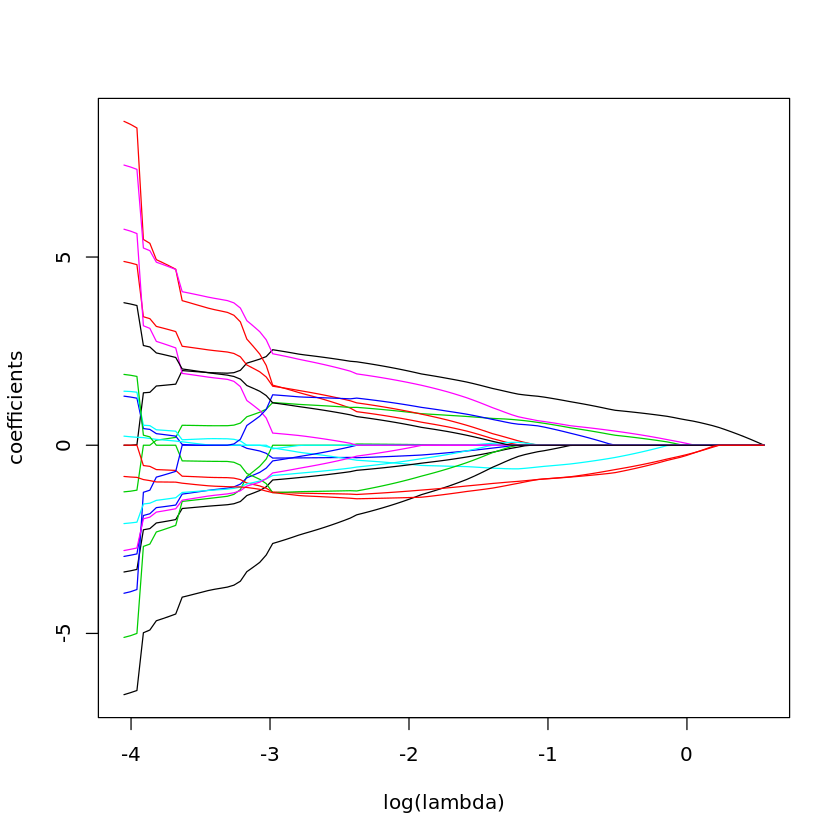

In [67]:
fit_hmlasso <- hmlasso(x.miss, y) 
plot(fit_hmlasso)

In [68]:
# Cross Validation for HMLasso
cv.fit_hmlasso <-cv.hmlasso(x.miss, y)
fit_hmlasso <- hmlasso(x.miss, y, lambda=cv.fit_hmlasso$lambda.min)
print(fit_hmlasso$beta)
#             [,1]
# [1,]  1.30137227
# [2,]  0.00000000
# [3,]  0.60682922
# [4,]  0.00000000
# [5,] -0.57899508
# [6,]  0.65230778
# [7,]  0.00000000
# [8,]  0.00000000
# [9,]  0.00000000
#[10,]  0.00000000
#[11,]  0.01089438
#[12,]  0.00000000
#[13,] -0.17263369
#[14,] -0.91035339
#[15,]  0.00000000
#[16,]  0.51472445
#[17,]  0.00000000
#[18,]  0.00000000
#[19,]  0.00000000
#[20,] -0.91232818

             [,1]
 [1,]  1.30137227
 [2,]  0.00000000
 [3,]  0.60682922
 [4,]  0.00000000
 [5,] -0.57899508
 [6,]  0.65230778
 [7,]  0.00000000
 [8,]  0.00000000
 [9,]  0.00000000
[10,]  0.00000000
[11,]  0.01089438
[12,]  0.00000000
[13,] -0.17263369
[14,] -0.91035339
[15,]  0.00000000
[16,]  0.51472445
[17,]  0.00000000
[18,]  0.00000000
[19,]  0.00000000
[20,] -0.91232818
